# 📘 Advanced Features: Callbacks, Robust Fitting, Auto Initial Guess⏱️ **30-40 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Advanced**---

## 🎯 What You'll Learn- ✓ **Monitor** optimization progress with callbacks- ✓ **Handle outliers** with robust loss functions- ✓ **Auto-generate** initial parameter guesses- ✓ **Customize** optimization algorithms- ✓ **Diagnose** convergence issues---

## Setup

In [1]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [2]:
from IPython.display import display

In [3]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import CurveFit, auto_select_algorithm, callbacks

np.random.seed(42)


⚠️  GPU ACCELERATION AVAILABLE
═══════════════════════════════
NVIDIA GPU detected: NVIDIA GeForce RTX 4090 Laptop GPU
JAX is currently using: CPU-only

Enable 150-270x speedup with GPU acceleration:
  make install-jax-gpu

Or manually:
  pip uninstall -y jax jaxlib
  pip install "jax[cuda12-local]>=0.6.0"

See README.md GPU Installation section for details.



## 1. Progress Monitoring with Callbacks**Use case:** Track optimization progress in real-time

In [4]:
from nlsq.callbacks import ProgressBar


# Define model
def exponential(x, a, b, c):
    return a * jnp.exp(-b * x) + c

# Generate data
x = np.linspace(0, 10, 100)
y = 5 * np.exp(-0.5 * x) + 2 + np.random.normal(0, 0.2, 100)

# Create callback
progress = ProgressBar(desc="Fitting exponential")

# Fit with callback
jcf = CurveFit()
popt, pcov = jcf.curve_fit(
    exponential, x, y,
    p0=[4, 0.4, 1.5],
    callback=progress
)

print(f"\nFitted parameters: {popt}")

/home/wei/Documents/GitHub/NLSQ/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:nlsq.curve_fit:Starting curve fit | {'n_params': 3, 'n_data_points': 100, 'method': 'trf', 'solver': 'auto', 'batch_size': None, 'has_bounds': False, 'dynamic_sizing': False}


INFO:nlsq.least_squares:Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-08, 'xtol': 1e-08, 'gtol': 1e-08}


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) | {'n_params': 3, 'n_residuals': 100, 'max_nfev': None}


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=0 | cost=1.740775e+01 | ‖∇f‖=1.016770e+02 | nfev=1


Fitting exponential: 0it [00:00, ?it/s]

Fitting exponential: 0it [00:00, ?it/s, cost=1.641811e+00, grad=1.017e+02, iter=1]

PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=1 | cost=1.641811e+00 | ‖∇f‖=2.067582e+00 | step=4.290688e+00 | nfev=2


Fitting exponential: 1it [00:00, 383.74it/s, cost=1.549768e+00, grad=2.068e+00, iter=2]

PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=2 | cost=1.549768e+00 | ‖∇f‖=1.593636e-01 | step=4.290688e+00 | nfev=3


Fitting exponential: 2it [00:00, 473.24it/s, cost=1.549732e+00, grad=1.594e-01, iter=3]

PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=3 | cost=1.549732e+00 | ‖∇f‖=3.522976e-04 | step=4.290688e+00 | nfev=4


Fitting exponential: 3it [00:00, 525.01it/s, cost=1.549732e+00, grad=3.523e-04, iter=4]

PERFORMANCE:nlsq.least_squares:Timer: optimization took 0.615649s


INFO:nlsq.least_squares:Convergence: reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=1.549732e+00 | time=0.616s | final_gradient_norm=7.969750338450884e-06


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit took 0.972285s


INFO:nlsq.curve_fit:Curve fit completed | {'total_time': 0.9722846120130271, 'final_cost': 3.0994630386261166, 'covariance_warning': False}



Fitted parameters: [5.1017183  0.53903947 2.02937336]


## 2. Robust Fitting (Outlier Rejection)**Problem:** Outliers distort least-squares fits**Solution:** Use robust loss functions

INFO:nlsq.curve_fit:Starting curve fit | {'n_params': 3, 'n_data_points': 100, 'method': 'trf', 'solver': 'auto', 'batch_size': None, 'has_bounds': False, 'dynamic_sizing': False}


INFO:nlsq.least_squares:Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-08, 'xtol': 1e-08, 'gtol': 1e-08}


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) | {'n_params': 3, 'n_residuals': 100, 'max_nfev': None}


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=0 | cost=6.397404e+01 | ‖∇f‖=1.439503e+02 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=1 | cost=3.727926e+01 | ‖∇f‖=2.659823e+00 | step=4.290688e+00 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=2 | cost=3.716032e+01 | ‖∇f‖=5.168863e-01 | step=4.290688e+00 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=3 | cost=3.715997e+01 | ‖∇f‖=7.384652e-03 | step=4.290688e+00 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization took 0.006414s


INFO:nlsq.least_squares:Convergence: reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=3.715997e+01 | time=0.006s | final_gradient_norm=0.00040546177878084664


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit took 0.061175s


INFO:nlsq.curve_fit:Curve fit completed | {'total_time': 0.06117485600407235, 'final_cost': 74.31993528297913, 'covariance_warning': False}


INFO:nlsq.curve_fit:Starting curve fit | {'n_params': 3, 'n_data_points': 100, 'method': 'trf', 'solver': 'auto', 'batch_size': None, 'has_bounds': False, 'dynamic_sizing': False}


INFO:nlsq.least_squares:Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'huber', 'ftol': 1e-08, 'xtol': 1e-08, 'gtol': 1e-08}


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) | {'n_params': 3, 'n_residuals': 100, 'max_nfev': None}


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=0 | cost=3.516163e+01 | ‖∇f‖=1.053810e+02 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=1 | cost=1.825239e+01 | ‖∇f‖=7.891794e+00 | step=2.145344e+00 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=2 | cost=1.805814e+01 | ‖∇f‖=2.962694e-02 | step=2.145344e+00 | nfev=4


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=3 | cost=1.805810e+01 | ‖∇f‖=1.074447e-04 | step=2.145344e+00 | nfev=5


PERFORMANCE:nlsq.least_squares:Timer: optimization took 0.333793s


INFO:nlsq.least_squares:Convergence: reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=1.805810e+01 | time=0.334s | final_gradient_norm=1.5157280516081965e-06


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit took 0.535794s


INFO:nlsq.curve_fit:Curve fit completed | {'total_time': 0.5357937729859259, 'final_cost': 36.1161945150345, 'covariance_warning': False}


Standard fit (affected by outliers):
  Parameters: [5.03629603 0.53503088 2.22573614]

Robust fit (resistant to outliers):
  Parameters: [5.08587837 0.53217949 2.07260078]


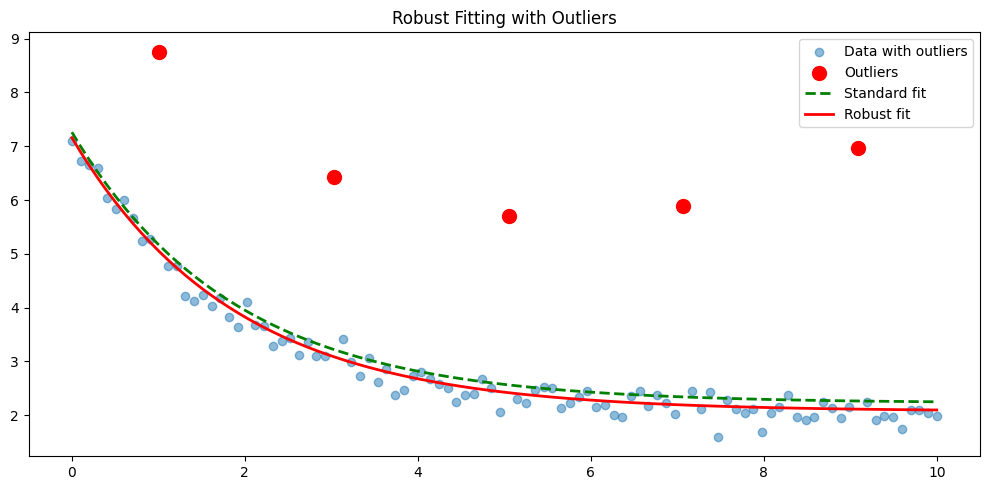

In [5]:
# Generate data with outliers
y_outliers = y.copy()
outlier_idx = [10, 30, 50, 70, 90]
y_outliers[outlier_idx] += np.random.uniform(3, 5, len(outlier_idx))

# Standard fit (affected by outliers)
popt_std, _ = jcf.curve_fit(exponential, x, y_outliers, p0=[4, 0.4, 1.5])

# Robust fit
popt_robust, _ = jcf.curve_fit(
    exponential, x, y_outliers,
    p0=[4, 0.4, 1.5],
    loss='huber'  # Robust loss function
)

print("Standard fit (affected by outliers):")
print(f"  Parameters: {popt_std}")
print("\nRobust fit (resistant to outliers):")
print(f"  Parameters: {popt_robust}")

# Visualize
fig = plt.figure(figsize=(10, 5))
plt.scatter(x, y_outliers, alpha=0.5, label='Data with outliers')
plt.scatter(x[outlier_idx], y_outliers[outlier_idx], c='red', s=100, label='Outliers')
plt.plot(x, exponential(x, *popt_std), 'g--', label='Standard fit', linewidth=2)
plt.plot(x, exponential(x, *popt_robust), 'r-', label='Robust fit', linewidth=2)
plt.legend()
plt.title('Robust Fitting with Outliers')
plt.tight_layout()
plt.show()

## 3. Automatic Initial Guess**Feature:** NLSQ can estimate initial parameters automatically

In [6]:
# Fit without providing p0 (auto-guess)try:    popt_auto, _ = jcf.curve_fit(exponential, x, y)    print("Auto-generated initial guess successful!")    print(f"Fitted parameters: {popt_auto}")except Exception as e:    print(f"Auto-guess failed: {e}")    print("Tip: Provide p0 for complex models")

## 4. Algorithm Selection**NLSQ features:** Automatic algorithm selection based on problem characteristics

In [7]:
# Auto-select algorithmrecommendations = auto_select_algorithm(exponential, x, y)print("Algorithm Recommendations:")print(f"  Algorithm: {recommendations['algorithm']}")print(f"  Tolerance: {recommendations['ftol']}")print(f"  Complexity: {recommendations.get('complexity', 'Standard')}")# Use recommended settingspopt_opt, _ = jcf.curve_fit(    exponential, x, y,    p0=[4, 0.4, 1.5],    ftol=recommendations['ftol'])print(f"\nOptimized fit: {popt_opt}")

## 🔑 Key Takeaways1. **Callbacks** enable real-time monitoring2. **Robust loss** handles outliers gracefully3. **Auto p0** simplifies fitting4. **Algorithm selection** optimizes convergence5. **Customization** gives fine control---

## 🔗 Next Steps- [Performance Optimization](performance_optimization_demo.ipynb) - Speed up fits- [Custom Algorithms](../03_advanced/custom_algorithms_advanced.ipynb) - Implement your own- [Troubleshooting Guide](../03_advanced/troubleshooting_guide.ipynb) - Diagnose issues---